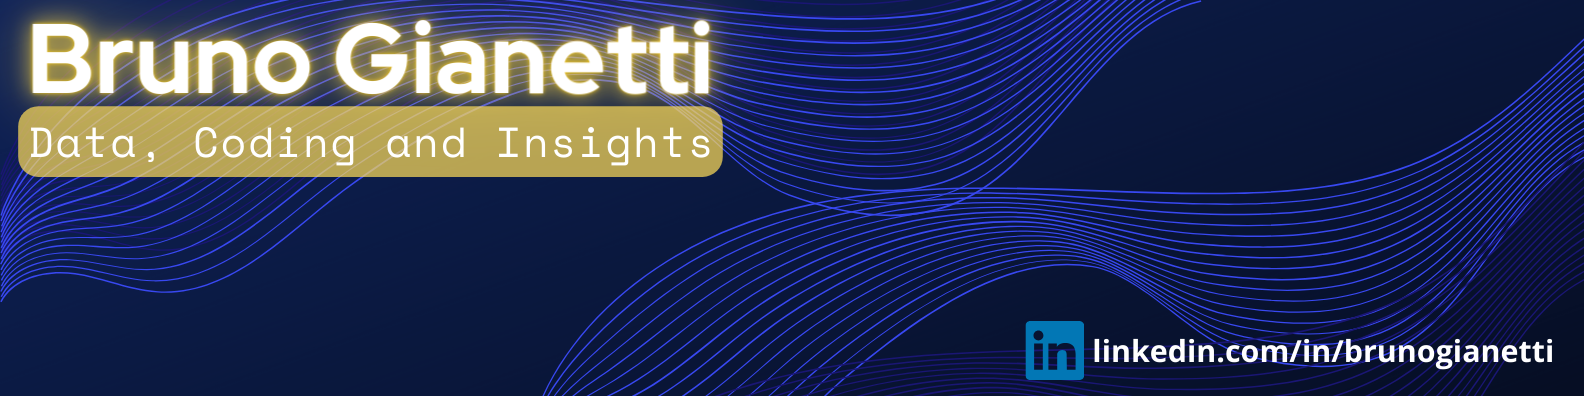

#Deep Learning para e-commerce

No presente trabalho de redes neurais (deep learning) será utilizado a biblioteca Tensorflow e a API Keras para classificar imagens de uma loja de roupas on line. O dataset utilizado é o Fashion MNIST que é um grande banco de dados disponível gratuitamente de imagens de moda que é comumente usado para treinar e testar vários sistemas de aprendizado de máquina.

####Imports de bibliotecas

In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

####Explorando o conjunto de dados

In [3]:
dataset = keras.datasets.fashion_mnist

# X_treino,Y_treino e X_teste,Y_teste
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
len(imagens_treino)

60000

In [5]:
imagens_treino.shape

(60000, 28, 28)

In [6]:
imagens_teste.shape

(10000, 28, 28)

In [7]:
len(identificacoes_treino)

60000

In [8]:
len(identificacoes_teste)

10000

####Plotando alguns gráficos

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

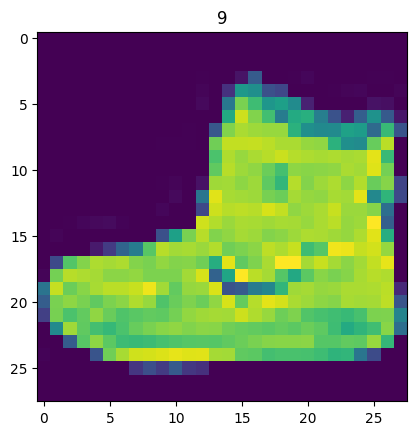

In [9]:
plt.imshow(imagens_treino[0])

# Identificação entre imagem e elemento do array
plt.title(identificacoes_treino[0])
identificacoes_treino

In [10]:
identificacoes_treino.min()

0

In [11]:
identificacoes_treino.max()

9

In [12]:
# Se os vetores vão de 0 a 9, logo teremos 10 classificações
total_de_classificacoes = 10

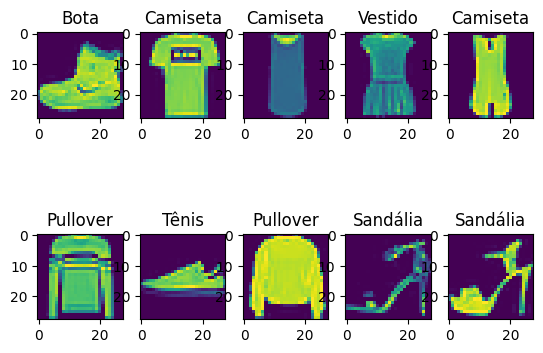

In [13]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [14]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 5s 2ms/step - loss: 3.8434


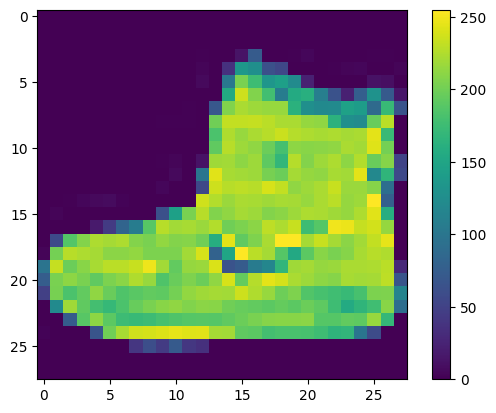

In [15]:
# Exemplo de imagem para notarmos os valores de escala
plt.imshow(imagens_treino[0])
plt.colorbar()

#### Normalizando as imagens

In [57]:
#transformando a escala da imagem acima para diminuir a perda (loss)

imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam',
               loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 5s 2ms/step - loss: 2.3025


Separando a normalização do processo de treino para evitar erros ou distorções durante o processo de treinamento.

In [17]:
imagens_treino = imagens_treino/float(255)

In [18]:
# adicionamos mais camadas e observamos o que ocorre com o loss.
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                          keras.layers.Dense(128, activation = tensorflow.nn.relu),
                          keras.layers.Dense(64, activation = tensorflow.nn.relu),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

# Para este caso, quanto mais camadas adicionamos, mais o loss aumenta.
# Como queremos o menor loss possível, concluímos que uma camada apenas (256) é a
# melhor opção.

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8054


In [19]:
# diminuindo a quantidade de camadas porque somente 256 estava melhor
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                          #keras.layers.Dense(128, activation = tensorflow.nn.relu),
                          #keras.layers.Dense(64, activation = tensorflow.nn.relu),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

# notamos que não obtivemos mais o valor de Loss como o de 0.48, mas sim um maior de 0.96
# isso ocorre por conta do runtime do notebook

1875/1875 [==============================] - 5s 2ms/step - loss: 0.9835


In [20]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0502 - accuracy: 0.6632 - val_loss: 0.6755 - val_accuracy: 0.7594
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6217 - accuracy: 0.7763 - val_loss: 0.5762 - val_accuracy: 0.7885
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5482 - accuracy: 0.8050 - val_loss: 0.5274 - val_accuracy: 0.8117
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5077 - accuracy: 0.8203 - val_loss: 0.4994 - val_accuracy: 0.8212
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4811 - accuracy: 0.8299 - val_loss: 0.4751 - val_accuracy: 0.8303


#### Visualizando acurácias, perdas e validações

In [21]:
historico

In [22]:
historico.history

{'loss': [1.0501620769500732,
  0.6216568350791931,
  0.5482344031333923,
  0.5076745748519897,
  0.4810747802257538],
 'accuracy': [0.6632083058357239,
  0.7762916684150696,
  0.804979145526886,
  0.8203333616256714,
  0.8299375176429749],
 'val_loss': [0.6755043268203735,
  0.5762446522712708,
  0.5274242162704468,
  0.4993615746498108,
  0.47506994009017944],
 'val_accuracy': [0.7594166398048401,
  0.7885000109672546,
  0.8116666674613953,
  0.8211666941642761,
  0.8302500247955322]}

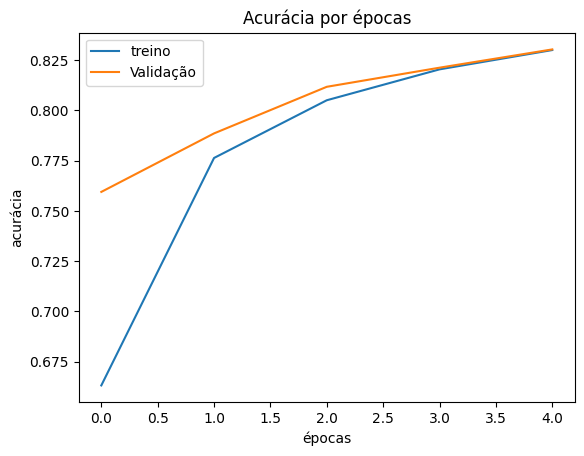

In [23]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

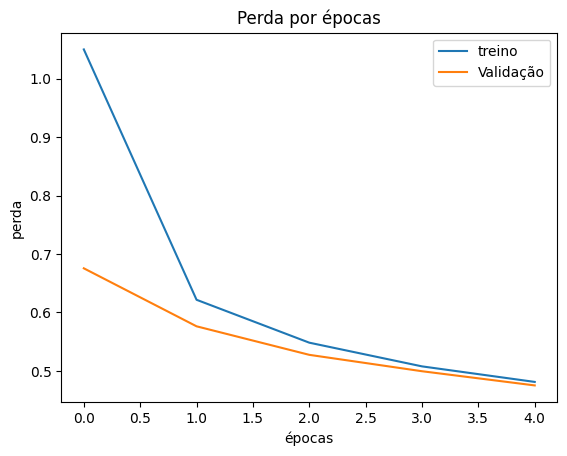

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

In [25]:
# Aumentando o nº de épocas.
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0589 - accuracy: 0.6677 - val_loss: 0.6809 - val_accuracy: 0.7530
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6264 - accuracy: 0.7743 - val_loss: 0.5773 - val_accuracy: 0.7930
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5501 - accuracy: 0.8034 - val_loss: 0.5238 - val_accuracy: 0.8138
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5069 - accuracy: 0.8214 - val_loss: 0.4950 - val_accuracy: 0.8232
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4797 - accuracy: 0.8310 - val_loss: 0.4758 - val_accuracy: 0.8276
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4608 - accuracy: 0.8383 - val_loss: 0.4587 - val_accuracy: 0.8359
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4458 - accuracy: 0.8439 - val_loss: 0.4504 - val_accuracy:

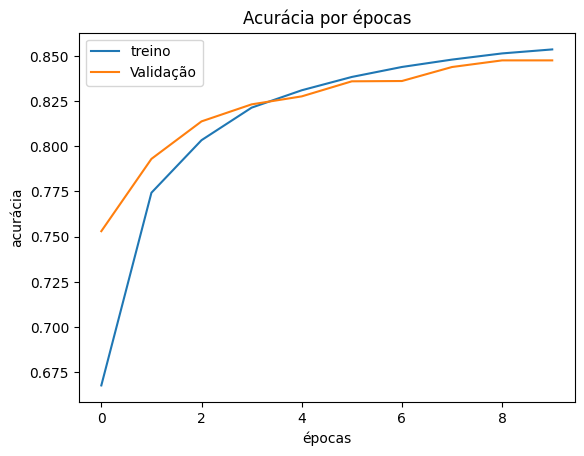

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

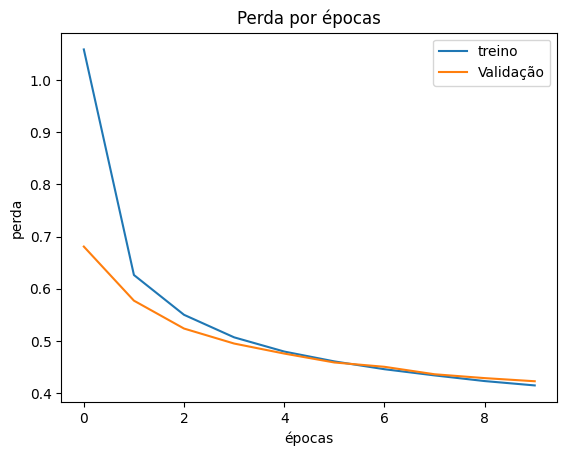

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

In [61]:
# Acertando o overfiting com Dropout, ou seja, deixando alguns ciclos de épocas "dormentes".
# Normalização
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
             keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo.hdf5',
                                             monitor = 'val_loss',
                                             save_best_only = True)]

adam = keras.optimizers.Adam(lr=0.002)

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,
                       identificacoes_treino,
                       batch_size = 480,
                       epochs=10,
                       validation_split=0.2,
                       callbacks = callbacks
                       )

Epoch 1/10
100/100 [==============================] - 2s 17ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 2/10
100/100 [==============================] - 1s 13ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0957


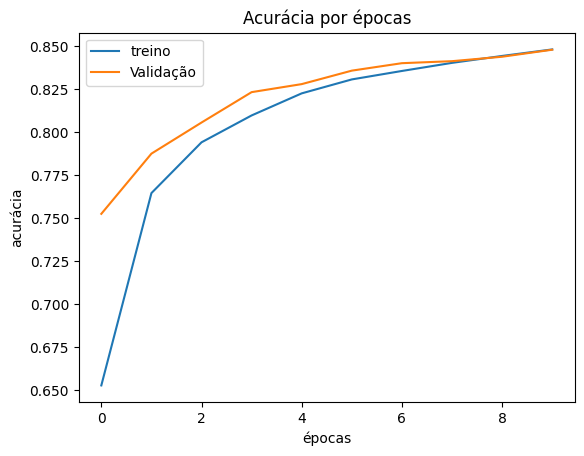

In [29]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

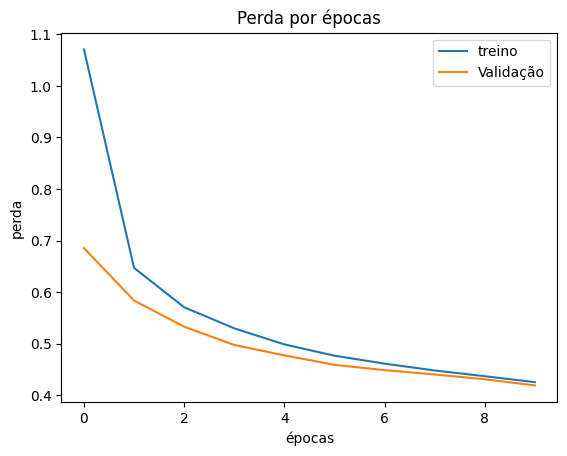

In [30]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

In [31]:
testes = modelo.predict(imagens_teste)
print('Resultado do teste[0]:', np.argmax(testes[0]))
print('Número da imagem de teste[0]:', identificacoes_teste[0])
print('Resultado do teste[1]:', np.argmax(testes[1]))
print('Número da imagem de teste[1]:', identificacoes_teste[1])
print('Resultado do teste[3]:', np.argmax(testes[3]))
print('Número da imagem de teste[3]:', identificacoes_teste[3])

313/313 [==============================] - 0s 1ms/step
Resultado do teste[0]: 9
Número da imagem de teste[0]: 9
Resultado do teste[1]: 2
Número da imagem de teste[1]: 2
Resultado do teste[3]: 1
Número da imagem de teste[3]: 1


In [32]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acuracia do teste:', acuracia_teste)

313/313 [==============================] - 1s 1ms/step - loss: 14435.9668 - accuracy: 0.7346
Perda do teste: 14435.966796875
Acuracia do teste: 0.7346000075340271


#### Sumário do Modelo

In [33]:
# Resumo do modelo
sumario_do_modelo = modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Pesos da Primeira Camada Dense.

In [34]:
# Posição 0 [0] são os pesos do modelo
pesos_da_camada_dense = modelo.layers[1].get_weights()[0]
pesos_da_camada_dense

array([[ 0.0180567 , -0.02760956, -0.0788218 , ...,  0.06460887,
         0.03162371, -0.10365526],
       [-0.17057997, -0.04715115,  0.21788691, ...,  0.03439214,
        -0.0664996 , -0.2181168 ],
       [-0.44552904, -0.0921244 ,  0.48109138, ...,  0.0291483 ,
         0.17688775, -0.36972398],
       ...,
       [ 0.5469186 , -0.8470409 ,  0.66738653, ..., -0.03963204,
        -0.92276394,  0.7017806 ],
       [ 0.69029427, -0.7363296 ,  0.3703683 , ...,  0.04711057,
        -0.33833   ,  0.60803986],
       [ 0.0069149 , -0.37206873,  0.17506784, ..., -0.01975325,
         0.04495361, -0.09244487]], dtype=float32)

In [35]:
# Posição 1 [1] dos pesos nos dá os vieses
vieses_da_camada_dense = modelo.layers[1].get_weights()[1]
vieses_da_camada_dense

array([ 6.58187494e-02,  1.47198588e-02,  5.73656932e-02,  1.12154104e-01,
       -7.90718477e-03,  8.80815759e-02,  4.31082658e-02, -5.26304776e-03,
       -8.36849678e-03,  3.38407978e-02, -8.41431227e-03,  5.30058146e-02,
       -5.53881191e-03,  4.28647138e-02,  1.10065073e-01, -1.03132389e-02,
        1.02852345e-01,  5.91045804e-02,  3.41713689e-02,  7.00055882e-02,
       -5.98742953e-03,  1.09534927e-01,  7.44998232e-02,  8.41603428e-02,
        1.20887391e-01,  5.31612225e-02,  7.59661719e-02,  1.51106358e-01,
       -6.00490626e-03, -5.34249656e-03,  4.72393446e-02,  7.42616728e-02,
        7.18050227e-02, -5.99711994e-03,  1.05362661e-01,  4.54824828e-02,
        9.16747376e-03,  1.33510336e-01,  1.83903962e-01,  9.31139365e-02,
        8.46394971e-02,  4.47564721e-02,  4.18235883e-02,  3.38120200e-02,
        2.68882252e-02,  8.38838443e-02,  1.27199724e-01,  1.50692863e-02,
       -8.34441185e-03,  3.31158750e-03, -5.99279348e-03,  5.73497042e-02,
       -5.99832553e-03,  

In [36]:
# zerando os pesos
pesos_da_camada_dense.shape
pesos_da_camada_dense_zerados = np.zeros((784, 256))
pesos_da_camada_dense_zerados

modelo.layers[1].set_weights([pesos_da_camada_dense_zerados,
                              vieses_da_camada_dense])

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 6.58187494e-02,  1.47198588e-02,  5.73656932e-02,  1.12154104e-01,
        -7.90718477e-03,  8.80815759e-02,  4.31082658e-02, -5.26304776e-03,
        -8.36849678e-03,  3.38407978e-02, -8.41431227e-03,  5.30058146e-02,
        -5.53881191e-03,  4.28647138e-02,  1.10065073e-01, -1.03132389e-02,
         1.02852345e-01,  5.91045804e-02,  3.41713689e-02,  7.00055882e-02,
        -5.98742953e-03,  1.09534927e-01,  7.44998232e-02,  8.41603428e-02,
         1.20887391e-01,  5.31612225e-02,  7.59661719e-02,  1.51106358e-01,
        -6.00490626e-03, -5.34249656e-03,  4.72393446e-02,  7.42616728e-02,
         7.18050227e-02, -5.99711994e-03,  1.05362661e-01,  4.54824828e-02,
         9.16747376e-03,  1.33510336e-01,  1.8390396

In [37]:
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8913 - accuracy: 0.7038 - val_loss: 0.5994 - val_accuracy: 0.7939
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5760 - accuracy: 0.7981 - val_loss: 0.5220 - val_accuracy: 0.8198
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.8192 - val_loss: 0.4827 - val_accuracy: 0.8293
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4817 - accuracy: 0.8300 - val_loss: 0.4608 - val_accuracy: 0.8342
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4617 - accuracy: 0.8364 - val_loss: 0.4503 - val_accuracy: 0.8375


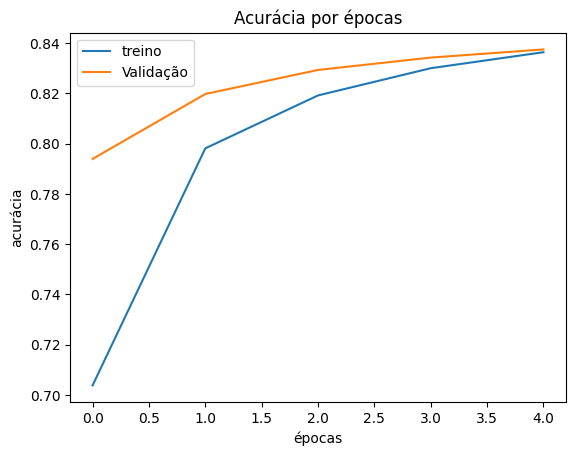

In [38]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

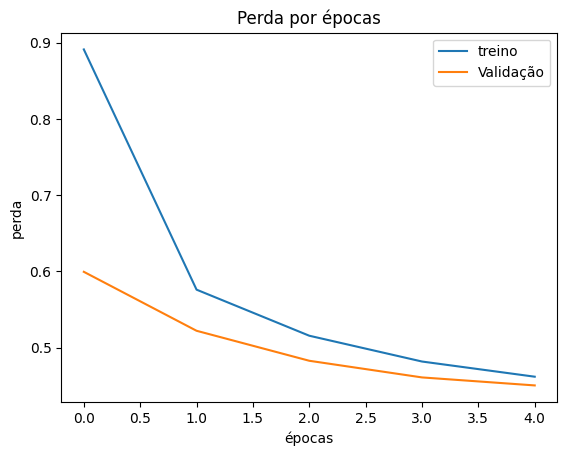

In [39]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

In [40]:
# Definindo números aleatórios para os pesos
pesos_da_camada_dense_aleatorios = np.random.rand(784, 256)
pesos_da_camada_dense_aleatorios

array([[0.58078885, 0.75225606, 0.14677151, ..., 0.54134992, 0.04458696,
        0.35073975],
       [0.77639307, 0.59061689, 0.91638445, ..., 0.91588419, 0.08762672,
        0.38770364],
       [0.61723778, 0.54332224, 0.79765963, ..., 0.79846159, 0.29842916,
        0.90506025],
       ...,
       [0.30374598, 0.53564816, 0.35084991, ..., 0.66039804, 0.60939351,
        0.48967222],
       [0.27904491, 0.56097316, 0.49750541, ..., 0.53164034, 0.00106817,
        0.71975451],
       [0.62609679, 0.3890364 , 0.20162108, ..., 0.6861318 , 0.6877507 ,
        0.17506823]])

In [41]:
modelo.layers[1].set_weights([pesos_da_camada_dense_aleatorios, vieses_da_camada_dense])

In [42]:
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3698 - accuracy: 0.5128 - val_loss: 0.6497 - val_accuracy: 0.7709
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8190 - accuracy: 0.7345 - val_loss: 0.5915 - val_accuracy: 0.7947
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6668 - accuracy: 0.7742 - val_loss: 0.5472 - val_accuracy: 0.8100
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5986 - accuracy: 0.7937 - val_loss: 0.5159 - val_accuracy: 0.8215
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5519 - accuracy: 0.8100 - val_loss: 0.4969 - val_accuracy: 0.8280


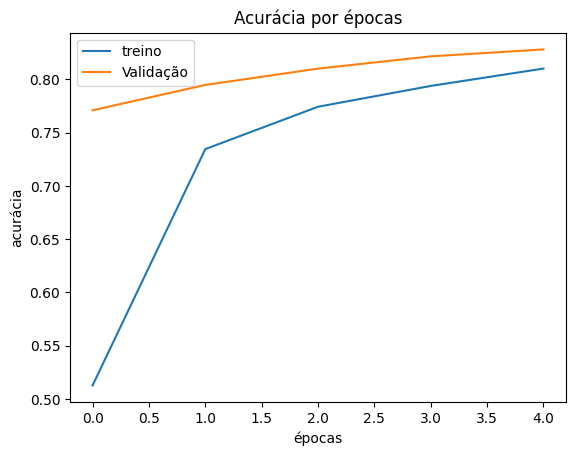

In [43]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

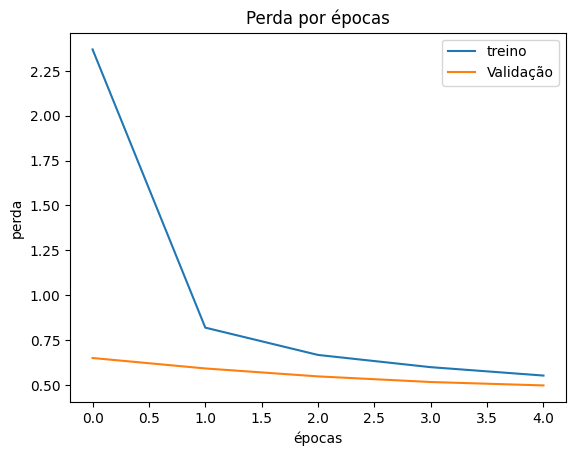

In [44]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

In [45]:
modelo.get_config()

{'name': 'sequential_6',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_6_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_6',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_14',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_n

In [46]:
# Trabalhando com a zeragem dos vieses
vieses_da_camada_dense.shape

(256,)

In [50]:
# Trabalhando com pesos e vieses zerados
vieses_da_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_da_camada_dense_zerados, vieses_da_camada_dense_zerados]
)

In [51]:
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3217 - accuracy: 0.1001 - val_loss: 2.3037 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0995


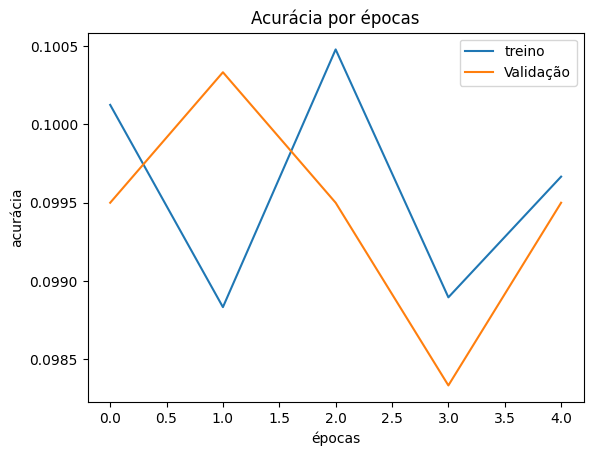

In [52]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

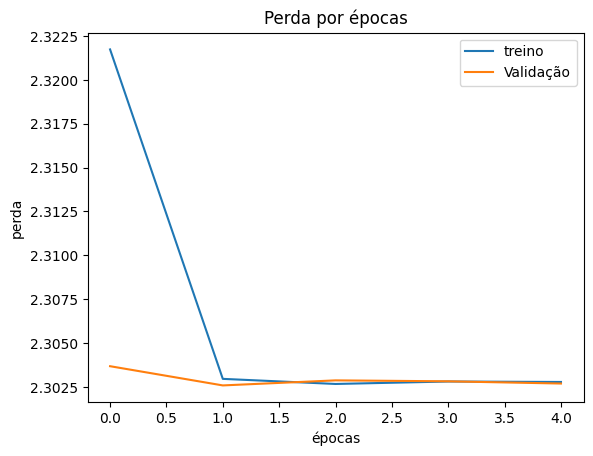

In [53]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

In [54]:
# Trabalhando com pesos aleatórios e vieses zerados
modelo.layers[1].set_weights(
    [pesos_da_camada_dense_aleatorios, vieses_da_camada_dense_zerados]
)

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.8318 - accuracy: 0.5405 - val_loss: 0.6716 - val_accuracy: 0.7669
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7849 - accuracy: 0.7375 - val_loss: 0.5989 - val_accuracy: 0.7943
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6646 - accuracy: 0.7703 - val_loss: 0.5597 - val_accuracy: 0.8112
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6042 - accuracy: 0.7907 - val_loss: 0.5245 - val_accuracy: 0.8139
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5601 - accuracy: 0.8061 - val_loss: 0.5028 - val_accuracy: 0.8234


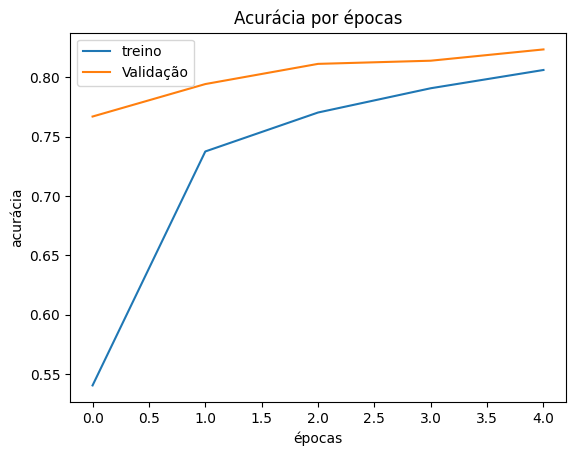

In [55]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'Validação'])

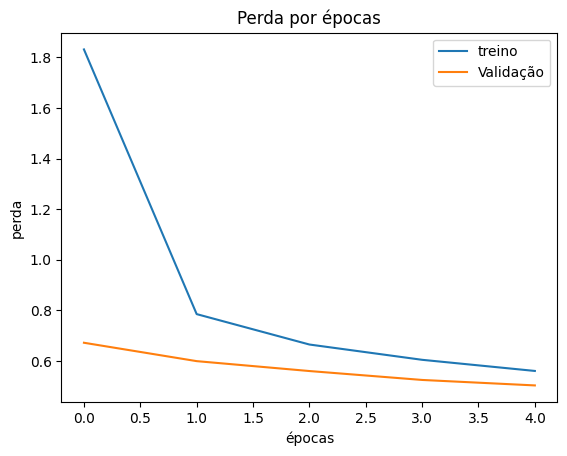

In [56]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'Validação'])

#### Salvando o modelo

In [47]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 0s 1ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 0s 1ms/step
resultado teste: 2
número da imagem de teste: 2
